In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [2]:
#uzeto iz fajla za analizu podataka
kolone = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", 
            "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsiveness", "SS", 
            "Alchocol", "Amphet", "Amyl", "Benzos", "Caff", "Canabis", "Choc", "Coke", "Crack", "Ecstasy", 
            "Heroin", "Ketamin", "LegalH", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

podaci = pd.read_csv('drug_consumption.data', names = kolone)

podaci = podaci.drop('ID', axis = 1)

podaci = podaci.drop('Semer', axis = 1)

In [3]:
niska_korelacija = ['Age', 'Gender', 'Education', 'Alchocol','Ascore','Caff']
for column in niska_korelacija:
    podaci = podaci.drop(column, axis=1)
podaci.head()

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsiveness,SS,Amphet,Amyl,...,Crack,Ecstasy,Heroin,Ketamin,LegalH,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.00665,-0.21712,-1.18084,CL2,CL0,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,CL2,CL2,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.01450,-1.37983,0.40148,CL0,CL0,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.58489,-1.37983,-1.18084,CL0,CL0,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,0.96082,-0.31685,0.73545,-1.63340,-0.45174,1.30612,-0.21712,-0.21575,CL1,CL1,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0


In [4]:
# posto imamo vise klasa koje ispitujemo, razdvajam podatke na atribute i na klase
podaci.head()

#izdvajanje atributa
atributi1 = podaci.columns
atributi1

atributi = []
for atribut in atributi1:
    if atribut == 'Amphet':
        break
    atributi.append(atribut)
    
print(atributi, end = ', ')

['Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Cscore', 'Impulsiveness', 'SS'], 

In [5]:
#izdvajanje klasa
klase = []
for atribut in atributi1:
    if atribut not in atributi:
        klase.append(atribut)
        
print(klase, end = ', ')
print()

# provera deljenja kolona
print(len(klase) + len(atributi) == len(podaci.columns))

['Amphet', 'Amyl', 'Benzos', 'Canabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamin', 'LegalH', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA'], 
True


In [6]:
podaci_skalirano = podaci.copy()
# for a in atributi:
#     skalirani_podaci[a] = skaliraj_podatke(skalirani_podaci[a])
    
# #provera uspesnosti skaliranja
# for a in atributi:
#     print(len(skalirani_podaci[a].unique()) == len(podaci[a].unique()), end = ", ")
    
# #nismo izgubili podatke

In [7]:
# podaci bez klasa
podaci_bez_klasa = podaci.copy()
for x in klase:
    podaci_bez_klasa = podaci_bez_klasa.drop(x, axis = 1)
podaci_bez_klasa

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsiveness,SS
0,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.00665,-0.21712,-1.18084
1,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575
2,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.01450,-1.37983,0.40148
3,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.58489,-1.37983,-1.18084
4,0.96082,-0.31685,0.73545,-1.63340,-0.45174,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...,...,...
1880,-0.57009,-0.31685,-1.19430,1.74091,1.88511,-1.13788,0.88113,1.92173
1881,-0.57009,-0.31685,-0.24649,1.74091,0.58331,-1.51840,0.88113,0.76540
1882,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.38502,0.52975,-0.52593
1883,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-2.57309,1.29221,1.22470


In [8]:
for x in klase:
    podaci_skalirano = podaci_skalirano.drop(x, axis = 1)
podaci_skalirano

,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsiveness,SS
0,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.00665,-0.21712,-1.18084
1,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575
2,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.01450,-1.37983,0.40148
3,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.58489,-1.37983,-1.18084
4,0.96082,-0.31685,0.73545,-1.63340,-0.45174,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...,...,...
1880,-0.57009,-0.31685,-1.19430,1.74091,1.88511,-1.13788,0.88113,1.92173
1881,-0.57009,-0.31685,-0.24649,1.74091,0.58331,-1.51840,0.88113,0.76540
1882,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.38502,0.52975,-0.52593
1883,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-2.57309,1.29221,1.22470


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# POMOCNA FJA ZA GRAFICKI PRIKAZ, kod uzet sa vezbi
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import classification_report_imbalanced
from termcolor import colored, cprint


def report_imbalanced(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report_imbalanced(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
#     vrste = ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']
    kolone = ['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6']
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns = kolone, index = kolone))
    print("---------------------------------------------------------------------------------")

def report(model, x, y, text = "trening", ):
    y_pred = model.predict(x)
    
    print(colored('\t' + f'Klasifikacioni izveštaj za model {type(model).__name__} nad {text} podacima', 'blue', attrs= ['bold']))
    cprint('----------------------------------------------------------------------------------------------', attrs= ['bold'])
    cprint(classification_report(y, y_pred), attrs= ['dark']) 
    cprint('----------------------------------------------------------------------------------------------', attrs= ['bold'])

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve 
def plot_learning_curve(model, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=3, random_state=42, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='b')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


In [11]:
X, y = podaci_bez_klasa, podaci['Heroin']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)

In [12]:
mreza = MLPClassifier(hidden_layer_sizes=(100,60,80), max_iter=20)
mreza.fit(X_train, y_train)

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 60, 80), max_iter=20)

In [13]:
report_imbalanced(mreza, X_train, y_train)

Classification report for model MLPClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

        CL0       0.85      1.00      0.00      0.92      0.00      0.00      1123
        CL1       1.00      0.00      1.00      0.00      0.00      0.00        48
        CL2       1.00      0.00      1.00      0.00      0.00      0.00        66
        CL3       1.00      0.00      1.00      0.00      0.00      0.00        45
        CL4       1.00      0.00      1.00      0.00      0.00      0.00        17
        CL5       1.00      0.00      1.00      0.00      0.00      0.00        11
        CL6       1.00      0.00      1.00      0.00      0.00      0.00         9

avg / total       0.87      0.85      0.15      0.78      0.00      0.00      1319

---------------------------------------------------------------------------------
Confusion matrix for mo

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neura

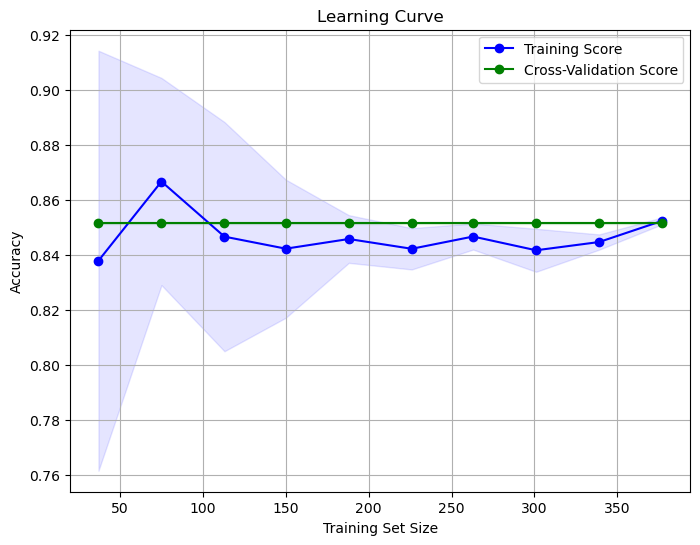

In [14]:
plot_learning_curve(mreza, X_test, y_test)

In [15]:

mreza = MLPClassifier(hidden_layer_sizes=(100,60,80), max_iter=20)

parametri = {
    'hidden_layer_sizes': [(80, 20, 60), (50, 30, 20), (100, 60, 80), (100, 60, 40)],
    'activation': ['relu', 'logistic', 'tanh'],
    'learning_rate': ['adaptive', 'constant', 'invscaling'],
    'max_iter': [10, 20, 30]
}

In [16]:
grid = GridSearchCV(mreza, param_grid=parametri, scoring='accuracy', cv=2, verbose=3)

In [17]:
grid.fit(X_train, y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV 1/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=10;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=20;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=30;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=30;, score=0.851 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=20;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=20;, score=0.851 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=30;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=10;, score=0.851 total time=   0.0s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=20;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=30;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=10;, score=0.756 total time=   0.0s
[CV 2/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=20;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=20;, score=0.851 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neura

[CV 1/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=30;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=10;, score=0.851 total time=   0.0s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=20;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=30;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neura

[CV 2/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=20;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=20;, score=0.851 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=30;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=10;, score=0.851 total time=   0.0s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=20;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=20;, score=0.851 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=30;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=10;, score=0.852 total time=   0.0s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=20;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=20;, score=0.851 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=30;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=10;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=20;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=20;, score=0.851 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=30;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=10;, score=0.851 total time=   0.0s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=20;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=30;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=20;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=30;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=30;, score=0.851 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=20;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=20;, score=0.851 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=30;, score=0.852 total time=   0.1s
[CV 2/2] END activation=relu, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=10;, score=0.851 total time=   0.0s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=20;, score=0.852 total time=   0.1s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=30;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=20;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=30;, score=0.852 total time=   0.1s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=20;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=30;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=20;, score=0.852 total time=   0.1s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=20;, score=0.851 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=30;, score=0.852 total time=   0.1s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=10;, score=0.851 total time=   0.0s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=20;, score=0.852 total time=   0.1s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=30;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neura

[CV 2/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=20;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=30;, score=0.852 total time=   0.1s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=30;, score=0.851 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=10;, score=0.852 total time=   0.1s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=20;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=30;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=20;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=30;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=20;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=30;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=20;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=30;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=20;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=30;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=20;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=30;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=logistic, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=10;, score=0.847 total time=   0.0s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=20;, score=0.850 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=30;, score=0.850 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=adaptive, max_iter=30;, score=0.847 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=10;, score=0.851 total time=   0.0s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=20;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=20;, score=0.847 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=30;, score=0.848 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=constant, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=10;, score=0.847 total time=   0.0s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=20;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=30;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, hidden_layer_sizes=(80, 20, 60), learning_rate=invscaling, max_iter=30;, score=0.850 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=10;, score=0.844 total time=   0.0s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=20;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=20;, score=0.847 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=30;, score=0.848 total time=   0.1s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=adaptive, max_iter=30;, score=0.847 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=10;, score=0.852 total time=   0.0s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=10;, score=0.850 total time=   0.0s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=20;, score=0.852 total time=   0.1s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=20;, score=0.850 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=30;, score=0.848 total time=   0.1s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, max_iter=30;, score=0.845 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=10;, score=0.850 total time=   0.0s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=10;, score=0.851 total time=   0.0s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=20;, score=0.852 total time=   0.1s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=20;, score=0.847 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=30;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, hidden_layer_sizes=(50, 30, 20), learning_rate=invscaling, max_iter=30;, score=0.847 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=10;, score=0.841 total time=   0.1s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=10;, score=0.838 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=20;, score=0.847 total time=   0.1s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=20;, score=0.848 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=30;, score=0.850 total time=   0.2s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=adaptive, max_iter=30;, score=0.847 total time=   0.2s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=10;, score=0.848 total time=   0.1s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=10;, score=0.848 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=20;, score=0.847 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=30;, score=0.842 total time=   0.2s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=constant, max_iter=30;, score=0.851 total time=   0.2s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=10;, score=0.845 total time=   0.1s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=10;, score=0.844 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=20;, score=0.850 total time=   0.1s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=20;, score=0.850 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=30;, score=0.852 total time=   0.2s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 80), learning_rate=invscaling, max_iter=30;, score=0.850 total time=   0.2s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=10;, score=0.842 total time=   0.1s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=10;, score=0.848 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=20;, score=0.848 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=20;, score=0.851 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=30;, score=0.852 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=adaptive, max_iter=30;, score=0.848 total time=   0.2s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=10;, score=0.852 total time=   0.1s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=10;, score=0.847 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=20;, score=0.844 total time=   0.1s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=20;, score=0.850 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=30;, score=0.848 total time=   0.1s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=constant, max_iter=30;, score=0.851 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=10;, score=0.850 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=10;, score=0.839 total time=   0.1s
[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=20;, score=0.848 total time=   0.1s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=20;, score=0.850 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=30;, score=0.852 total time=   0.2s
[CV 2/2] END activation=tanh, hidden_layer_sizes=(100, 60, 40), learning_rate=invscaling, max_iter=30;, score=0.851 total time=   0.1s


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=2,
             estimator=MLPClassifier(hidden_layer_sizes=(100, 60, 80),
                                     max_iter=20),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [(80, 20, 60), (50, 30, 20),
                                                (100, 60, 80), (100, 60, 40)],
                         'learning_rate': ['adaptive', 'constant',
                                           'invscaling'],
                         'max_iter': [10, 20, 30]},
             scoring='accuracy', verbose=3)

In [18]:
grid.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (80, 20, 60),
 'learning_rate': 'adaptive',
 'max_iter': 10}

In [19]:
mreza = MLPClassifier(activation = 'tanh', learning_rate = 'constant', hidden_layer_sizes=(50,30,20), max_iter=20)

In [20]:
mreza.fit(X_train, y_train)

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 30, 20), max_iter=20)

In [21]:
report_imbalanced(mreza, X_test, y_test)

Classification report for model MLPClassifier on training data
---------------------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

        CL0       0.85      1.00      0.01      0.92      0.11      0.01       482
        CL1       1.00      0.00      1.00      0.00      0.00      0.00        20
        CL2       0.00      0.00      1.00      0.00      0.00      0.00        28
        CL3       1.00      0.00      1.00      0.00      0.00      0.00        20
        CL4       1.00      0.00      1.00      0.00      0.00      0.00         7
        CL5       1.00      0.00      1.00      0.00      0.00      0.00         5
        CL6       1.00      0.00      1.00      0.00      0.00      0.00         4

avg / total       0.83      0.85      0.16      0.78      0.09      0.01       566

---------------------------------------------------------------------------------
Confusion matrix for mo

In [22]:
n = len(klase)
preciznosti = []
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(podaci_skalirano, podaci[klase[i]], test_size = 0.30,  random_state = 42)
    mreza.fit(X_train, y_train)
    
    print(klase[i])
    report(mreza, X_test, y_test, text= 'test')
    
    predicted = mreza.predict(X_test)
    preciznosti.append(round(accuracy_score(predicted, y_test), 4))

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Amphet
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.57      0.93      0.70       295
         CL1       0.00      0.00      0.00        77
         CL2       1.00      0.02      0.03        66
         CL3       0.30      0.40      0.35        60
         CL4       0.00      0.00      0.00        23
         CL5       0.00      0.00      0.00        19
         CL6       0.00      0.00      0.00        26

    accuracy                           0.53       566
   macro avg       0.27      0.19      0.15       566
weighted avg       0.44      0.53      0.41       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Amyl
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.69      1.00      0.82       391
         CL1       0.00      0.00      0.00        67
         CL2       0.75      0.05      0.09        66
         CL3       0.00      0.00      0.00        28
         CL4       0.00      0.00      0.00         9
         CL5       0.00      0.00      0.00         4
         CL6       0.00      0.00      0.00         1

    accuracy                           0.69       566
   macro avg       0.21      0.15      0.13       566
weighted avg       0.57      0.69      0.58       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Benzos
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.58      0.95      0.72       307
         CL1       0.00      0.00      0.00        29
         CL2       0.33      0.04      0.06        57
         CL3       0.21      0.12      0.15        76
         CL4       0.00      0.00      0.00        43
         CL5       0.00      0.00      0.00        23
         CL6       0.43      0.10      0.16        31

    accuracy                           0.54       566
   macro avg       0.22      0.17      0.16       566
weighted avg       0.40      0.54      0.43       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Canabis
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.47      0.85      0.61       123
         CL1       0.00      0.00      0.00        50
         CL2       0.13      0.05      0.07        76
         CL3       1.00      0.01      0.02        79
         CL4       0.00      0.00      0.00        43
         CL5       0.00      0.00      0.00        48
         CL6       0.41      0.83      0.55       147

    accuracy                           0.41       566
   macro avg       0.29      0.25      0.18       566
weighted avg       0.37      0.41      0.29       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Choc
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         6
         CL1       0.00      0.00      0.00         1
         CL2       0.00      0.00      0.00         4
         CL3       0.00      0.00      0.00        15
         CL4       0.00      0.00      0.00        80
         CL5       0.31      0.07      0.12       220
         CL6       0.42      0.90      0.57       240

    accuracy                           0.41       566
   macro avg       0.10      0.14      0.10       566
weighted avg       0.30      0.41      0.29       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Coke
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.58      0.94      0.71       311
         CL1       0.00      0.00      0.00        51
         CL2       0.00      0.00      0.00        72
         CL3       0.27      0.21      0.24        75
         CL4       0.00      0.00      0.00        37
         CL5       0.00      0.00      0.00        13
         CL6       0.00      0.00      0.00         7

    accuracy                           0.54       566
   macro avg       0.12      0.16      0.14       566
weighted avg       0.35      0.54      0.42       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Crack
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.87      1.00      0.93       492
         CL1       0.00      0.00      0.00        14
         CL2       0.00      0.00      0.00        38
         CL3       0.00      0.00      0.00        18
         CL4       0.00      0.00      0.00         2
         CL5       0.00      0.00      0.00         1
         CL6       0.00      0.00      0.00         1

    accuracy                           0.87       566
   macro avg       0.12      0.14      0.13       566
weighted avg       0.76      0.87      0.81       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Ecstasy
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.61      0.92      0.73       307
         CL1       0.00      0.00      0.00        34
         CL2       0.00      0.00      0.00        70
         CL3       0.32      0.38      0.34        88
         CL4       0.00      0.00      0.00        45
         CL5       0.00      0.00      0.00        16
         CL6       0.00      0.00      0.00         6

    accuracy                           0.56       566
   macro avg       0.13      0.18      0.15       566
weighted avg       0.38      0.56      0.45       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Heroin
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.85      1.00      0.92       481
         CL1       0.00      0.00      0.00        15
         CL2       0.00      0.00      0.00        30
         CL3       0.00      0.00      0.00        24
         CL4       0.00      0.00      0.00         9
         CL5       0.00      0.00      0.00         4
         CL6       0.00      0.00      0.00         3

    accuracy                           0.85       566
   macro avg       0.12      0.14      0.13       566
weighted avg       0.72      0.85      0.78       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Ketamin
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.79      1.00      0.88       448
         CL1       0.00      0.00      0.00        12
         CL2       0.00      0.00      0.00        36
         CL3       0.00      0.00      0.00        42
         CL4       0.00      0.00      0.00        11
         CL5       0.00      0.00      0.00        16
         CL6       0.00      0.00      0.00         1

    accuracy                           0.79       566
   macro avg       0.11      0.14      0.13       566
weighted avg       0.63      0.79      0.70       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

LegalH
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.65      0.94      0.77       314
         CL1       0.00      0.00      0.00         8
         CL2       0.00      0.00      0.00        63
         CL3       0.39      0.40      0.40       104
         CL4       0.00      0.00      0.00        35
         CL5       0.00      0.00      0.00        24
         CL6       0.00      0.00      0.00        18

    accuracy                           0.60       566
   macro avg       0.15      0.19      0.17       566
weighted avg       0.44      0.60      0.50       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

LSD
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.64      0.89      0.74       321
         CL1       0.17      0.01      0.02        77
         CL2       0.20      0.05      0.09        55
         CL3       0.32      0.46      0.38        68
         CL4       0.00      0.00      0.00        29
         CL5       0.00      0.00      0.00        13
         CL6       0.00      0.00      0.00         3

    accuracy                           0.57       566
   macro avg       0.19      0.20      0.18       566
weighted avg       0.44      0.57      0.48       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Meth
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.75      1.00      0.86       424
         CL1       0.00      0.00      0.00         8
         CL2       0.00      0.00      0.00        31
         CL3       1.00      0.02      0.04        49
         CL4       0.00      0.00      0.00        15
         CL5       0.00      0.00      0.00        17
         CL6       0.00      0.00      0.00        22

    accuracy                           0.75       566
   macro avg       0.25      0.15      0.13       566
weighted avg       0.65      0.75      0.65       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Mushrooms
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.61      0.88      0.72       288
         CL1       0.00      0.00      0.00        61
         CL2       0.00      0.00      0.00        77
         CL3       0.30      0.49      0.37        84
         CL4       0.00      0.00      0.00        39
         CL5       0.00      0.00      0.00        13
         CL6       0.00      0.00      0.00         4

    accuracy                           0.52       566
   macro avg       0.13      0.20      0.16       566
weighted avg       0.35      0.52      0.42       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Nicotine
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.41      0.57      0.47       143
         CL1       0.00      0.00      0.00        51
         CL2       0.00      0.00      0.00        62
         CL3       0.25      0.02      0.03        59
         CL4       0.00      0.00      0.00        27
         CL5       0.00      0.00      0.00        44
         CL6       0.39      0.77      0.52       180

    accuracy                           0.39       566
   macro avg       0.15      0.19      0.15       566
weighted avg       0.25      0.39      0.29       566

----------------------------------------------------------------------------------------------
VSA
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
--------------------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

In [23]:
preciznosti

[0.5283,
 0.6943,
 0.5424,
 0.4099,
 0.4081,
 0.5424,
 0.8693,
 0.5565,
 0.8498,
 0.7915,
 0.5972,
 0.5671,
 0.7509,
 0.5194,
 0.3905,
 0.765]

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:6

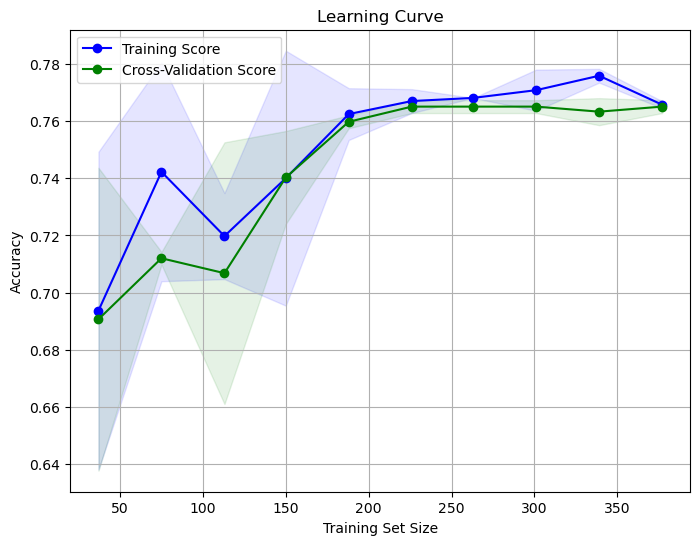

In [24]:
plot_learning_curve(mreza, X_test, y_test)

In [25]:
#ako bih skalirao?
def skaliraj_podatke(X):
    return (X - min(X))/(max(X) - min(X))

In [26]:
n = len(klase)
preciznosti_skalirano = []
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klasa, podaci[klase[i]], test_size = 0.30,  random_state = 42)
    mreza.fit(X_train, y_train)
    
    for a in atributi:
        X_train[a] = skaliraj_podatke(X_train[a])
        X_test[a] = skaliraj_podatke(X_test[a])
    
    
    print(klase[i])
    report(mreza, X_test, y_test, text= 'test')
    
    predicted = mreza.predict(X_test)
    preciznosti_skalirano.append(round(accuracy_score(predicted, y_test), 4))

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Amphet
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.52      1.00      0.69       295
         CL1       0.00      0.00      0.00        77
         CL2       0.00      0.00      0.00        66
         CL3       0.00      0.00      0.00        60
         CL4       0.00      0.00      0.00        23
         CL5       0.00      0.00      0.00        19
         CL6       0.00      0.00      0.00        26

    accuracy                           0.52       566
   macro avg       0.07      0.14      0.10       566
weighted avg       0.27      0.52      0.36       566

----------------------------------------------------------------------------------------------
Amyl
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
---------------------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Benzos
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.54      1.00      0.70       307
         CL1       0.00      0.00      0.00        29
         CL2       0.00      0.00      0.00        57
         CL3       0.00      0.00      0.00        76
         CL4       0.00      0.00      0.00        43
         CL5       0.00      0.00      0.00        23
         CL6       0.00      0.00      0.00        31

    accuracy                           0.54       566
   macro avg       0.08      0.14      0.10       566
weighted avg       0.30      0.54      0.38       566

----------------------------------------------------------------------------------------------
Canabis
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
------------------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Choc
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         6
         CL1       0.00      0.00      0.00         1
         CL2       0.00      0.00      0.00         4
         CL3       0.00      0.00      0.00        15
         CL4       0.00      0.00      0.00        80
         CL5       0.00      0.00      0.00       220
         CL6       0.42      1.00      0.60       240

    accuracy                           0.42       566
   macro avg       0.06      0.14      0.09       566
weighted avg       0.18      0.42      0.25       566

----------------------------------------------------------------------------------------------
Coke
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
-----------------------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Crack
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.87      1.00      0.93       492
         CL1       0.00      0.00      0.00        14
         CL2       0.00      0.00      0.00        38
         CL3       0.00      0.00      0.00        18
         CL4       0.00      0.00      0.00         2
         CL5       0.00      0.00      0.00         1
         CL6       0.00      0.00      0.00         1

    accuracy                           0.87       566
   macro avg       0.12      0.14      0.13       566
weighted avg       0.76      0.87      0.81       566

----------------------------------------------------------------------------------------------
Ecstasy
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
-------------------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Heroin
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.85      1.00      0.92       481
         CL1       0.00      0.00      0.00        15
         CL2       0.00      0.00      0.00        30
         CL3       0.00      0.00      0.00        24
         CL4       0.00      0.00      0.00         9
         CL5       0.00      0.00      0.00         4
         CL6       0.00      0.00      0.00         3

    accuracy                           0.85       566
   macro avg       0.12      0.14      0.13       566
weighted avg       0.72      0.85      0.78       566

----------------------------------------------------------------------------------------------
Ketamin
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
------------------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

LegalH
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.55      1.00      0.71       314
         CL1       0.00      0.00      0.00         8
         CL2       0.00      0.00      0.00        63
         CL3       0.00      0.00      0.00       104
         CL4       0.00      0.00      0.00        35
         CL5       0.00      0.00      0.00        24
         CL6       0.00      0.00      0.00        18

    accuracy                           0.55       566
   macro avg       0.08      0.14      0.10       566
weighted avg       0.31      0.55      0.40       566

----------------------------------------------------------------------------------------------
LSD
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Meth
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.75      1.00      0.86       424
         CL1       0.00      0.00      0.00         8
         CL2       0.00      0.00      0.00        31
         CL3       0.00      0.00      0.00        49
         CL4       0.00      0.00      0.00        15
         CL5       0.00      0.00      0.00        17
         CL6       0.00      0.00      0.00        22

    accuracy                           0.75       566
   macro avg       0.11      0.14      0.12       566
weighted avg       0.56      0.75      0.64       566

----------------------------------------------------------------------------------------------
Mushrooms
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
------------------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

In [27]:
preciznosti_skalirano

[0.5212,
 0.6873,
 0.5424,
 0.3781,
 0.424,
 0.523,
 0.8693,
 0.5477,
 0.8498,
 0.7915,
 0.553,
 0.5707,
 0.7491,
 0.5106,
 0.3304,
 0.765]

 # pokusavam da dodam atribute koristeci i ostale klase

In [212]:
podaci_skalirano = podaci.copy()

n = len(podaci_skalirano['Heroin'])
    
for x in klase:
    for i in range(n):
        podaci_skalirano[x][i] = int(podaci_skalirano[x][i].strip('CL'))
#     print(podaci_skalirano[x].unique())
        

# podaci_skalirano

/tmp/ipykernel_21578/3254782633.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podaci_skalirano[x][i] = int(podaci_skalirano[x][i].strip('CL'))


In [213]:
# treba mi za klasifikaciju
for x in klase:
    podaci_skalirano[x] = podaci_skalirano[x].astype('float64')

In [214]:
# #skaliram podatke
# for a in atributi:
#     podaci_skalirano[a] = skaliraj_podatke(podaci_skalirano[a])
# for a in klase:
#     podaci_skalirano[a] = skaliraj_podatke(podaci_skalirano[a])
# podaci_skalirano.describe()

In [215]:
#pravi skupove podataka pojedinacno bez svake klase
podaci_bez_klase = []
for x in klase:
    podaci_bez_klase.append(podaci_skalirano.drop(x, axis = 1))
    
#klasni_podaci, isto to
klasni_podaci = []
n = len(klase)
for i in range(n):
    klasni_podaci.append(podaci[klase[i]])
    
len(podaci_bez_klase)

19

In [217]:
#delimo podatke na train/test skupove
n = len(podaci_bez_klase)
preciznosti_sve = []
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(podaci_bez_klase[i], klasni_podaci[i], test_size = 0.30,  random_state = 42)
    mreza.fit(X_train, y_train)
    
    for a in atributi:
        X_train[a] = skaliraj_podatke(X_train[a])
        X_test[a] = skaliraj_podatke(X_test[a])
    
    print(klase[i])
    report(mreza, X_test, y_test, text= 'test')
    
    predicted = mreza.predict(X_test)
    preciznosti_sve.append(round(accuracy_score(y_test, predicted), 4))


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Alchocol
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00        11
         CL1       0.00      0.00      0.00        11
         CL2       0.00      0.00      0.00        24
         CL3       0.00      0.00      0.00        60
         CL4       0.20      0.01      0.02        96
         CL5       0.41      0.66      0.51       229
         CL6       0.29      0.41      0.34       135

    accuracy                           0.37       566
   macro avg       0.13      0.15      0.12       566
weighted avg       0.27      0.37      0.29       566

----------------------------------------------------------------------------------------------
Amphet
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
-----------------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Amyl
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.76      0.90      0.82       391
         CL1       0.30      0.09      0.14        67
         CL2       0.29      0.35      0.32        66
         CL3       0.00      0.00      0.00        28
         CL4       0.00      0.00      0.00         9
         CL5       0.00      0.00      0.00         4
         CL6       0.00      0.00      0.00         1

    accuracy                           0.67       566
   macro avg       0.19      0.19      0.18       566
weighted avg       0.59      0.67      0.62       566

----------------------------------------------------------------------------------------------
Benzos
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
---------------------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

         CL0       0.74      0.91      0.82       307
         CL1       0.50      0.03      0.06        29
         CL2       0.15      0.18      0.16        57
         CL3       0.20      0.11      0.14        76
         CL4       0.19      0.07      0.10        43
         CL5       0.00      0.00      0.00        23
         CL6       0.25      0.48      0.33        31

    accuracy                           0.56       566
   macro avg       0.29      0.25      0.23       566
weighted avg       0.50      0.56      0.51       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Caff
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         7
         CL1       0.00      0.00      0.00         4
         CL2       0.00      0.00      0.00         9
         CL3       0.00      0.00      0.00        20
         CL4       0.00      0.00      0.00        34
         CL5       0.00      0.00      0.00        76
         CL6       0.73      1.00      0.85       416

    accuracy                           0.73       566
   macro avg       0.10      0.14      0.12       566
weighted avg       0.54      0.73      0.62       566

----------------------------------------------------------------------------------------------
Canabis
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
--------------------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packa

              precision    recall  f1-score   support

         CL0       0.67      0.80      0.73       123
         CL1       0.33      0.02      0.04        50
         CL2       0.26      0.50      0.34        76
         CL3       0.38      0.08      0.13        79
         CL4       0.00      0.00      0.00        43
         CL5       0.14      0.02      0.04        48
         CL6       0.48      0.80      0.60       147

    accuracy                           0.46       566
   macro avg       0.32      0.32      0.27       566
weighted avg       0.40      0.46      0.39       566

----------------------------------------------------------------------------------------------
Choc
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.00      0.00      0.00         6
         CL1       0.00      0.00

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Coke
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.73      0.89      0.80       311
         CL1       0.50      0.02      0.04        51
         CL2       0.32      0.28      0.30        72
         CL3       0.34      0.55      0.42        75
         CL4       0.00      0.00      0.00        37
         CL5       0.00      0.00      0.00        13
         CL6       0.00      0.00      0.00         7

    accuracy                           0.60       566
   macro avg       0.27      0.25      0.22       566
weighted avg       0.53      0.60      0.54       566

----------------------------------------------------------------------------------------------
Crack
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Ecstasy
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.78      0.92      0.84       307
         CL1       0.00      0.00      0.00        34
         CL2       0.43      0.29      0.34        70
         CL3       0.36      0.60      0.45        88
         CL4       0.38      0.07      0.11        45
         CL5       0.00      0.00      0.00        16
         CL6       0.00      0.00      0.00         6

    accuracy                           0.63       566
   macro avg       0.28      0.27      0.25       566
weighted avg       0.56      0.63      0.58       566

----------------------------------------------------------------------------------------------
Heroin
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
------------------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Ketamin
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.83      0.98      0.90       448
         CL1       0.00      0.00      0.00        12
         CL2       0.21      0.08      0.12        36
         CL3       0.37      0.17      0.23        42
         CL4       0.00      0.00      0.00        11
         CL5       0.00      0.00      0.00        16
         CL6       0.00      0.00      0.00         1

    accuracy                           0.80       566
   macro avg       0.20      0.18      0.18       566
weighted avg       0.69      0.80      0.73       566

----------------------------------------------------------------------------------------------


/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

LegalH
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.70      0.94      0.80       314
         CL1       0.00      0.00      0.00         8
         CL2       0.67      0.03      0.06        63
         CL3       0.41      0.55      0.47       104
         CL4       0.00      0.00      0.00        35
         CL5       0.00      0.00      0.00        24
         CL6       0.00      0.00      0.00        18

    accuracy                           0.63       566
   macro avg       0.25      0.22      0.19       566
weighted avg       0.54      0.63      0.54       566

----------------------------------------------------------------------------------------------
LSD
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packa

Mushrooms
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.76      0.86      0.81       288
         CL1       0.40      0.03      0.06        61
         CL2       0.31      0.44      0.37        77
         CL3       0.38      0.58      0.46        84
         CL4       0.00      0.00      0.00        39
         CL5       0.00      0.00      0.00        13
         CL6       0.00      0.00      0.00         4

    accuracy                           0.59       566
   macro avg       0.27      0.27      0.24       566
weighted avg       0.53      0.59      0.54       566

----------------------------------------------------------------------------------------------
Nicotine
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
--------------------------------------------------------------

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

Semer
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.99      1.00      1.00       563
         CL2       0.00      0.00      0.00         1
         CL3       0.00      0.00      0.00         2

    accuracy                           0.99       566
   macro avg       0.33      0.33      0.33       566
weighted avg       0.99      0.99      0.99       566

----------------------------------------------------------------------------------------------
VSA
	Klasifikacioni izveštaj za model MLPClassifier nad test podacima
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         CL0       0.77      1.00      0.87       433
         CL1       0.00      0.00      0.00        59
         CL2       0.33      

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [218]:
preciznosti_sve

[0.3657,
 0.5601,
 0.6731,
 0.5601,
 0.735,
 0.4647,
 0.4382,
 0.5989,
 0.8604,
 0.6343,
 0.8481,
 0.7951,
 0.6272,
 0.6396,
 0.758,
 0.5866,
 0.4382,
 0.9947,
 0.765]

/home/dzzz/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/dzzz/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:6

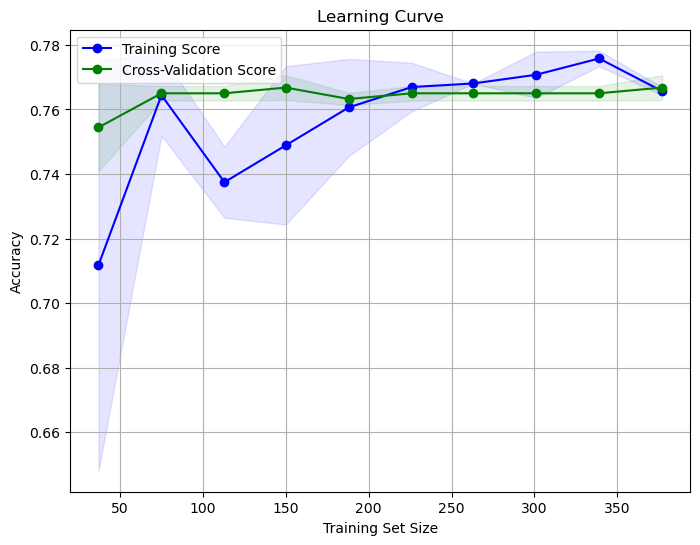

In [219]:
plot_learning_curve(mreza, X_test, y_test)

In [170]:
preciznosti

[0.3975,
 0.5088,
 0.689,
 0.5442,
 0.735,
 0.4346,
 0.4011,
 0.553,
 0.8657,
 0.553,
 0.8481,
 0.7915,
 0.6166,
 0.5777,
 0.7332,
 0.53,
 0.3869,
 0.9947,
 0.7668]

In [171]:
preciznosti_sve

[0.4117,
 0.576,
 0.7049,
 0.5972,
 0.735,
 0.4664,
 0.447,
 0.5972,
 0.8604,
 0.629,
 0.8498,
 0.788,
 0.6396,
 0.6396,
 0.7686,
 0.5883,
 0.4558,
 0.9947,
 0.7668]

In [172]:
modeli = ["Samo atributi", "Sve klase"]

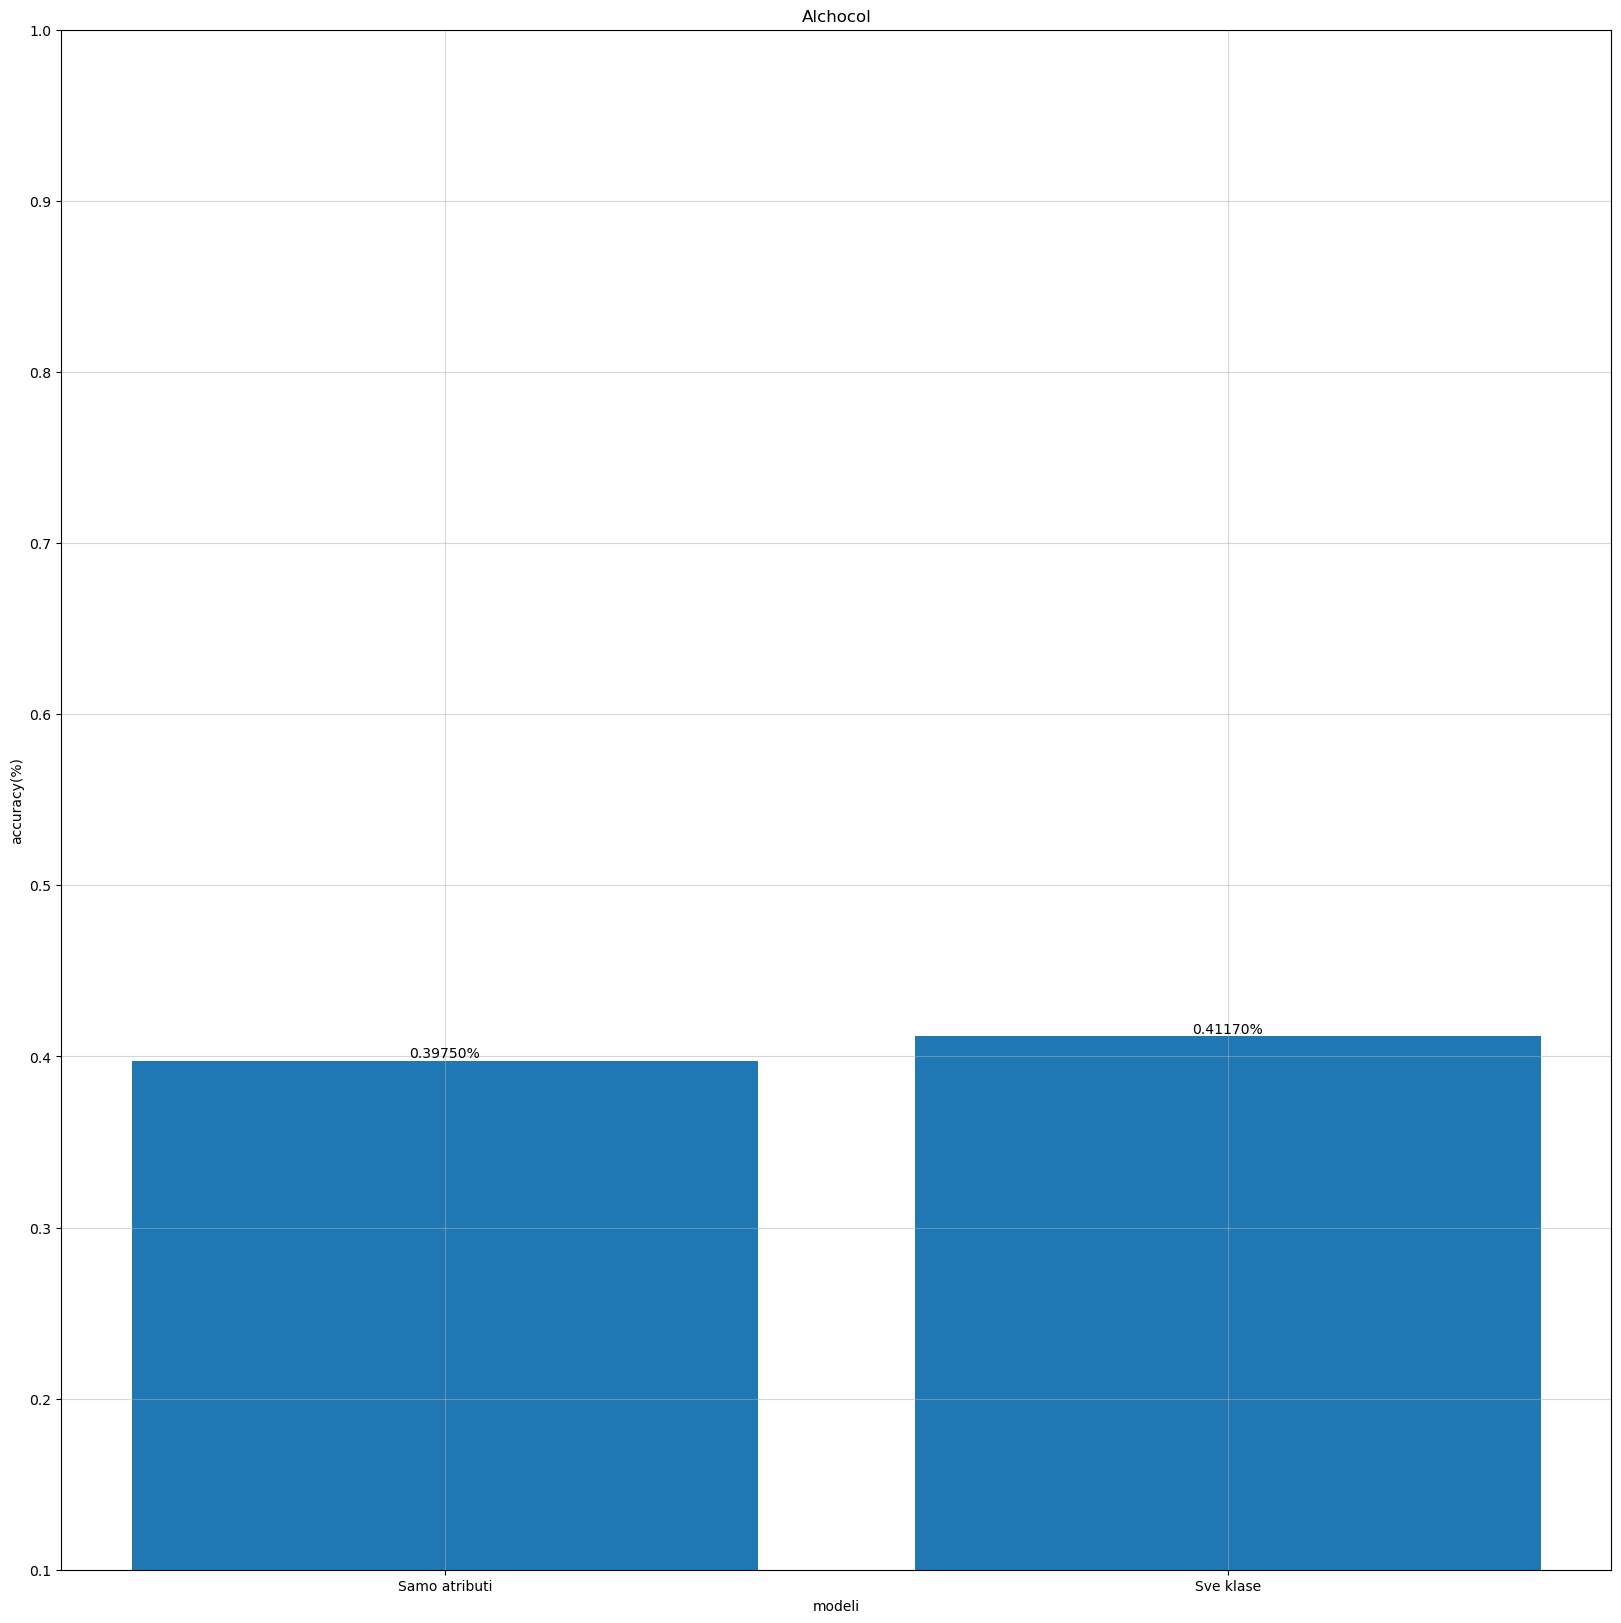

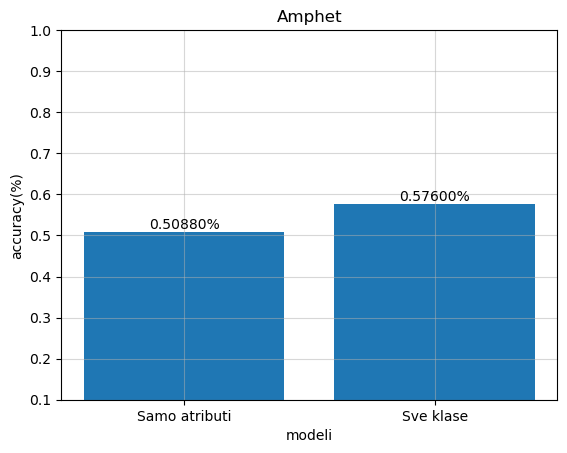

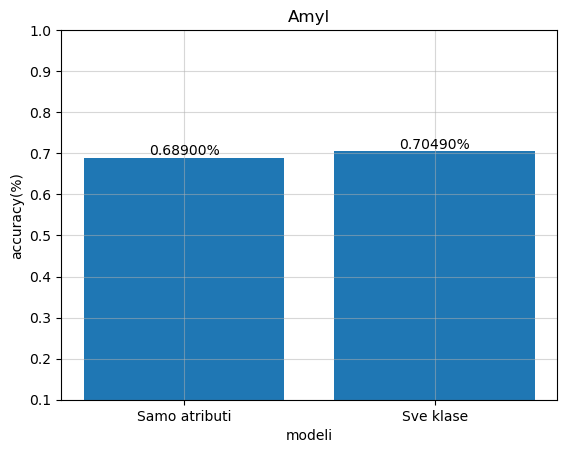

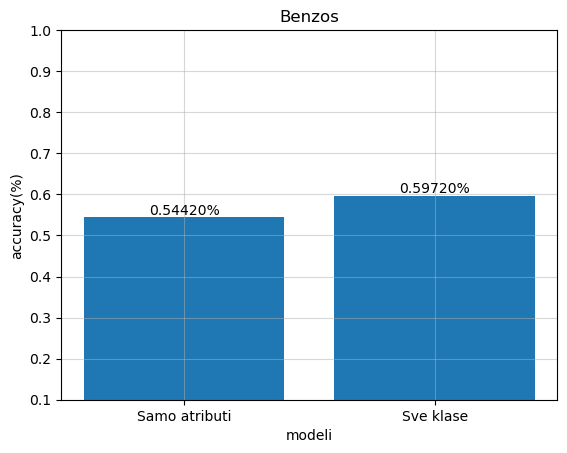

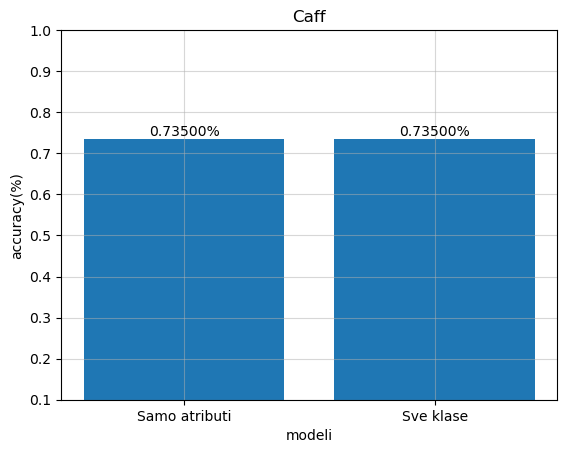

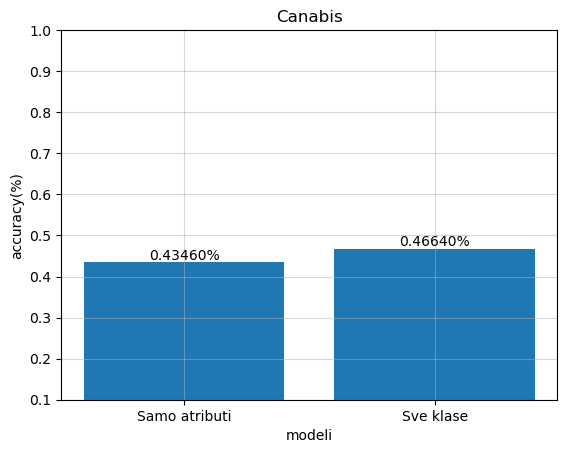

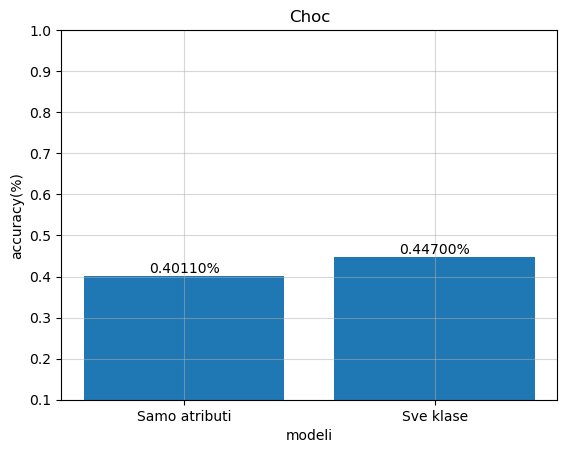

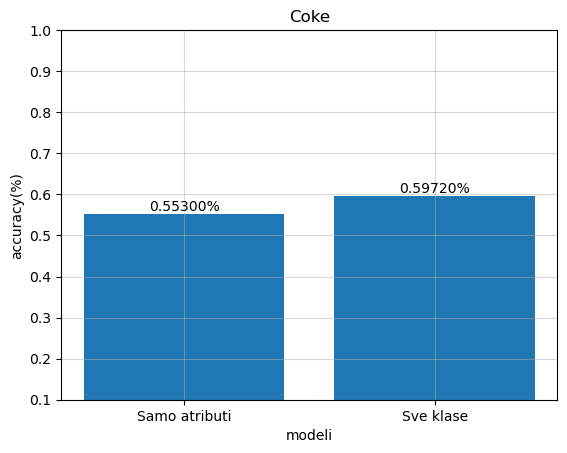

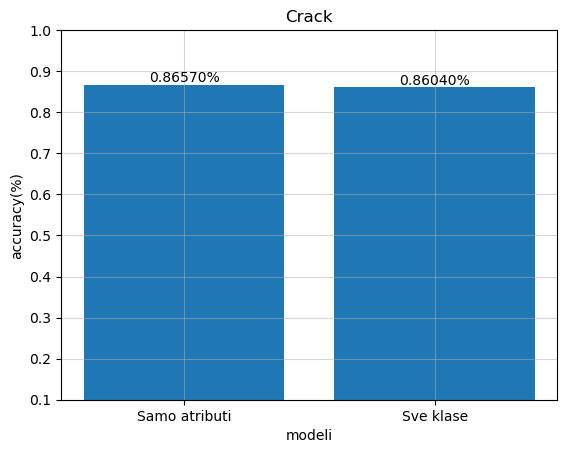

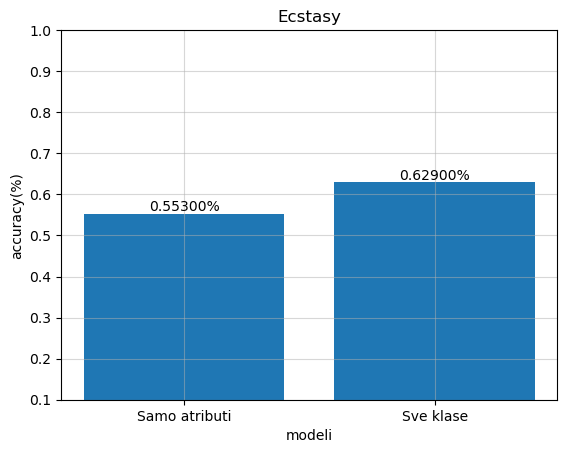

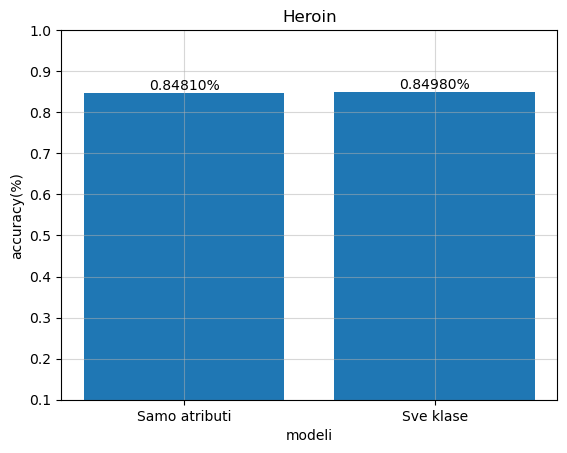

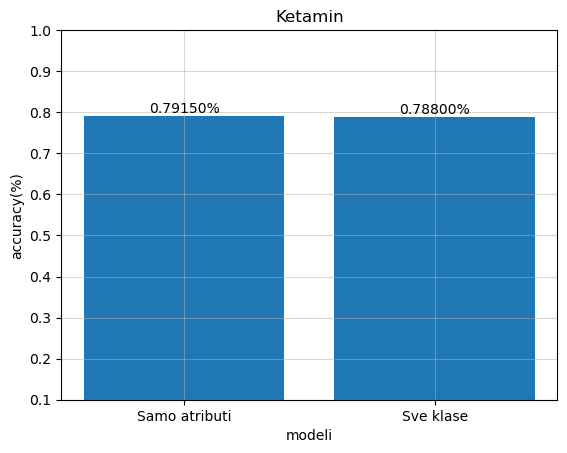

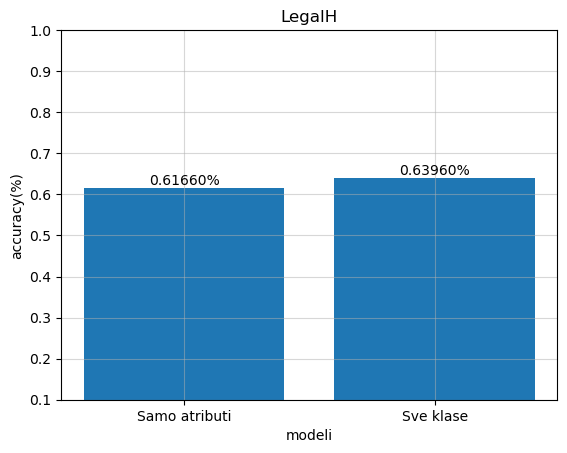

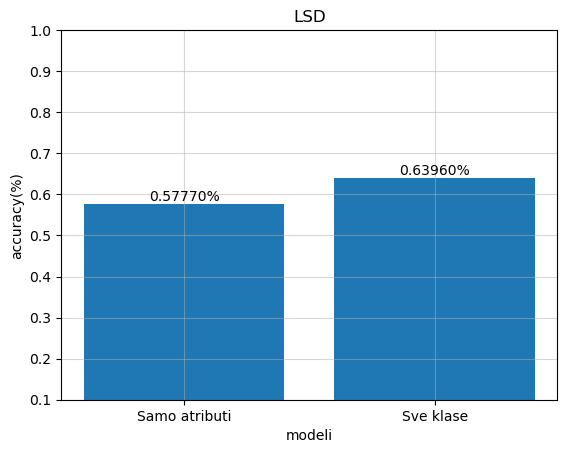

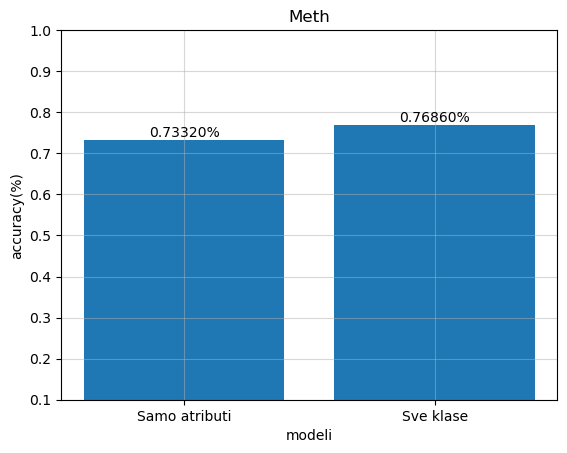

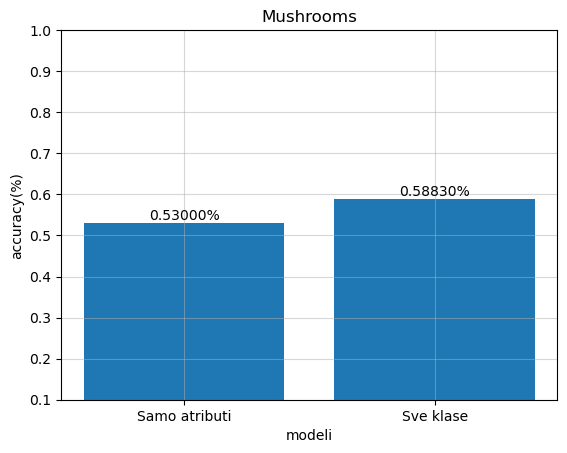

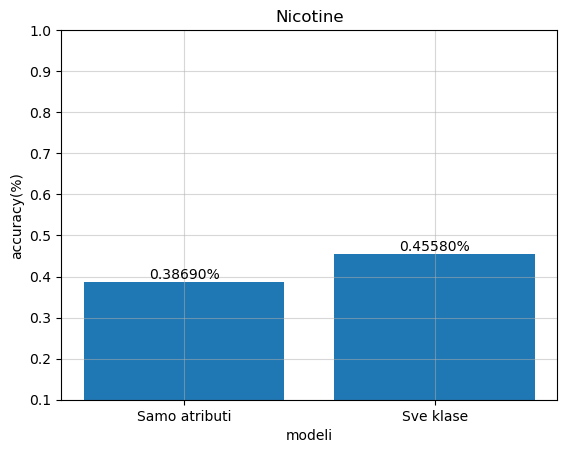

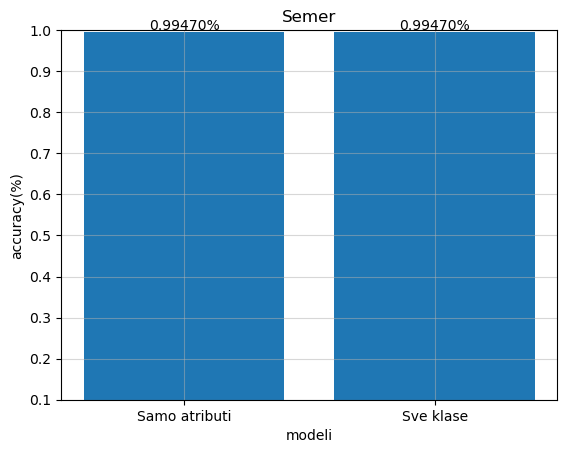

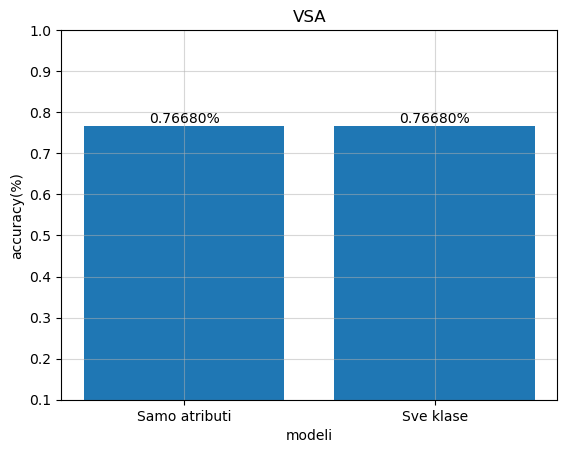

In [174]:
plt.figure(figsize = (20, 20))
for i in range(n):
    plt.title(f'{klase[i]}')
    vrednosti = [preciznosti[i], preciznosti_sve[i]]
    plt.bar(modeli, vrednosti)
    plt.grid(alpha = 0.5)
    plt.ylim(0.1, 1.0)
    for j, s in enumerate(vrednosti):
        plt.text(modeli[j], s, f'{s:.5f}%', ha='center', va='bottom')
    plt.xlabel('modeli')
    plt.ylabel('accuracy(%)')
    plt.show()


In [175]:
def prosek(niz):
    return sum(niz) / len(niz)
proseci = [prosek(preciznosti), prosek(preciznosti_sve)]

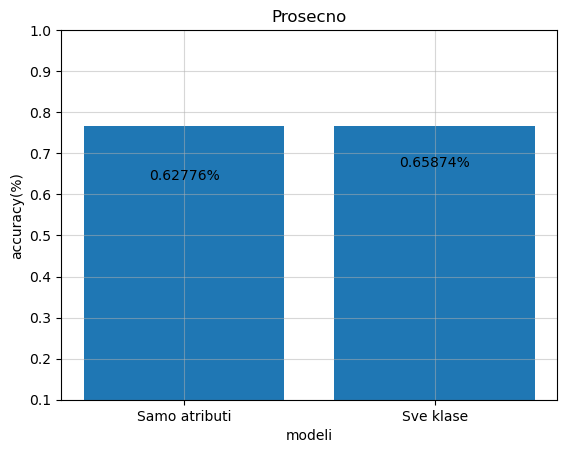

In [176]:
plt.title("Prosecno")
plt.bar(modeli, vrednosti)
plt.grid(alpha = 0.5)
plt.ylim(0.1, 1.0)
for j, s in enumerate(proseci):
    plt.text(modeli[j], s, f'{s:.5f}%', ha='center', va='bottom')
plt.xlabel('modeli')
plt.ylabel('accuracy(%)')
plt.show()

In [179]:
import joblib
joblib.dump(mreza, 'Mreza.pkl')

['Mreza.pkl']